<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 1. Библиотеки и инструменты для анализа данных. Математика в машинном обучении</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
%pylab inline
import pandas as pd
import sys
sys.path.append('../../scripts/') 
from scipy.stats import ttest_ind
# реализация Z-теста- дополнительно
from yandex_mipt_stat_tests import proportions_diff_z_test, proportions_diff_z_stat_ind

Populating the interactive namespace from numpy and matplotlib


В качестве дополнительного задания будет проверка статистических гипотез. Реализация Z-критерия: tribute to YDF & MIPT ([специализация](https://www.coursera.org/specializations/machine-learning-data-analysis) "Машинное обучение и анализ данных").

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [5]:
data.head(5)
#SibSp - сестры-братья-супруги
#Parch - родители-дети

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Как пример, возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [11]:
data['Name'][:10]

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [10]:
data['Parch'][:10]

PassengerId
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     2
10    0
Name: Parch, dtype: int64

**Или отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [8]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort(columns='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Примеры создания признаков**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]

In [9]:
data['Age_category'] = age_categories

**Другой способ - c apply**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

In [11]:
data['Num_relatives'] = data['Parch'] + data['SibSp']

In [12]:
data['Num_relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Num_relatives, dtype: int64

In [13]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Num_relatives
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0


**1. Сколько мужчин / жещин находилось на борту?**

In [13]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно - это же распределение только для мужчин / женщин.**


In [14]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
data[data['Sex'] == 'female']['Pclass'].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [16]:
data[data['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [25]:
round(data['Fare'].mean(), 2)

32.2

In [71]:
round(data['Fare'].median(), 2)

14.45

In [26]:
round(data['Fare'].std(), 2)

49.69

**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60. Дополнительно: проверить, действительно ли молодые выживают чаще, с помощью Z-критерия для разности долей в независимых выборках (proportions_diff_z_test из ../../scripts/yandex_mipt_stat_tests.py)**

In [46]:
young = data[(data['Age'] < 30) & (data['Survived'] == 1)].shape[0]/data[data['Age'] < 30].shape[0]
old = data[(data['Age'] > 60) & (data['Survived'] == 1)].shape[0]/data[data['Age'] > 60].shape[0]
print(young, old)

0.40625 0.22727272727272727


**5. Правда ли, что женщины выживали чаще мужчин? Дополнительно: проверить, действительно ли женщины выживают чаще, с помощью Z-критерия для разности долей в независимых выборках.**

In [50]:
female = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]/data[data['Sex'] == 'female'].shape[0]
male = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]/data[data['Sex'] == 'male'].shape[0]
print(female, male)

0.7420382165605095 0.18890814558058924


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [75]:
'Braund, Mr. Owen Harris'.split('. ')[1].split()[0]

'Owen'

In [77]:
first_names = data[data['Sex' == 'male']]['Names'].apply(lambda full_name: full_name..split('. ')[1].split()[0]).value_counts()

SyntaxError: invalid syntax (<ipython-input-77-13aa5931908e>, line 1)

**7. Сравните распределение стоимости билетов у спасенных и у погибших. Дополнительно: проверить равенство средних стоимостей билетов спасенных и погибших с помощью t-теста Стьюдента.**

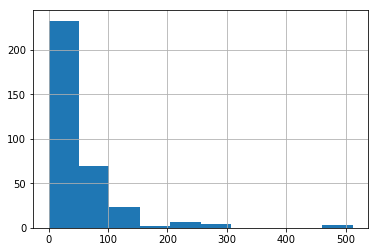

In [78]:
data[data['Survived'] == 1]['Fare'].hist()

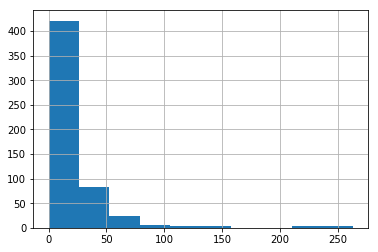

In [79]:
data[data['Survived'] == 0]['Fare'].hist()

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [64]:
pd.crosstab(data['Pclass'], data['Sex'], values = data['Age'], aggfunc=mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589
